In [3]:
import astropy
import astropy.io.fits as pyfits
import matplotlib
import matplotlib.pyplot as pyplot
import os

mast_filename='https://archive.stsci.edu/hlsps/illustris/mag30-fielda-11-10_images/hlsp_misty_illustris_jwst-nircam_mag30-fielda-11-10_f200w_v1_lightcone.fits'
hdu_list=pyfits.open(mast_filename)
print(hdu_list.info())

Filename: /Users/gsnyder/.astropy/cache/download/py3/fc063f31ac06551d2be72c0fe770990e
No.    Name         Type      Cards   Dimensions   Format
0    IMAGE_NOPSF  PrimaryHDU      25   (5378, 5378)   float64   
1    SimulationAssumptions  BinTableHDU     15   1R x 2C      [47A, 48A]   
2    MockDataAssumptions  ImageHDU        12   ()              
3    IMAGE_PSF   ImageHDU        11   (5378, 5378)   float64   
4    MODELPSF    ImageHDU         9   (79, 79)     float64   
5    Catalog     BinTableHDU    131   6524R x 61C   [K, K, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, K, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, 11A, K, K, D, D, D, K, K, D, D, D, D, K, K, D, D, K, 117A, L, D, D, D]   
6    CatalogDocumentation  BinTableHDU    131   1R x 61C     [61A, 57A, 61A, 15A, 14A, 35A, 50A, 50A, 50A, 66A, 76A, 48A, 48A, 48A, 45A, 32A, 51A, 2A, 37A, 78A, 39A, 39A, 101A, 84A, 39A, 74A, 55A, 46A, 50A, 144A, 144A, 47A, 137A, 137A, 12A, 70A, 155A, 158A, 39A, 36A, 51A, 42A, 57A

In [4]:
hdu_list['IMAGE_NOPSF'].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 5378                                                  
NAXIS2  =                 5378                                                  
EXTEND  =                    T                                                  
FILTER  = 'F200W   '           / filter                                         
PIXSIZE =               0.0317 / arcsec                                         
UNIT    = 'nanoJanskies'       / per pixel                                      
ABZP    =    31.40006562228223 / AB mag zeropoint                               
PHOTFNU =             2.64E-08 / Jy; approx flux[Jy] at 1 count/sec             
EXTNAME = 'IMAGE_NOPSF'                                                         
DOI     = 'https://doi.org/1

In [5]:
hdu_list['SimulationAssumptions'].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   95 / length of dimension 1                          
NAXIS2  =                    1 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    2 / number of table fields                         
TTYPE1  = 'apidoc  '                                                            
TFORM1  = '47A     '                                                            
TTYPE2  = 'url     '                                                            
TFORM2  = '48A     '                                                            
EXTNAME = 'SimulationAssumpt

In [6]:
hdu_list['MockDataAssumptions'].header

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
EXTNAME = 'MockDataAssumptions'                                                 
CODE    = 'Sunrise '                                                            
SMODEL  = 'Starburst99'                                                         
IMF     = 'Kroupa  '                                                            
ZS      = 'Multiple'           / stellar metallicities                          
DUST    = 'None    '                                                            
SMOOTH  = 'NGB64   '           / see Torrey et al. 2015                         

In [7]:
hdu_list['IMAGE_PSF'].header

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 5378                                                  
NAXIS2  =                 5378                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
EXTNAME = 'IMAGE_PSF'                                                           
REDSHIFT= '0.5-20  '           / Redshift of object or survey                   
PIXSIZE =               0.0317 / arcsec                                         
UNIT    = 'nanoJanskies'       / per pixel                                      

In [8]:
cat=hdu_list['catalog'].data
print(np.asarray(cat.columns.names))
newi=cat['new_i'] ; newj=cat['new_j']

['snapshot' 'SubfindID' 'ra_deg' 'dec_deg' 'ra_kpc' 'dec_kpc'
 'ra_kpc_inferred' 'dec_kpc_inferred' 'true_z' 'inferred_z' 'peculiar_z'
 'true_kpc_per_arcsec' 'X_cmpc' 'Y_cmpc' 'Z_cmpc' 'ADD_cmpc'
 'ADD_cmpc_inferred' 'snapshot_z' 'geometric_z' 'cylinder_number'
 'mstar_msun_rad' 'mgas_msun_rad' 'subhalo_mass_msun' 'bhmass_msun_rad'
 'mbary_msun_rad' 'sfr_msunperyr_rad' 'bhrate_code' 'camX_mpc' 'camY_mpc'
 'camZ_mpc' 'g_AB_absmag' 'r_AB_absmag' 'i_AB_absmag' 'z_AB_absmag'
 'v_kms_camX' 'v_kms_camY' 'v_kms_camZ' 'v_kms_hubble' 'g_AB_appmag' 'sim'
 'snap' 'sfid' 'z' 'RA' 'DEC' 'origin_i' 'origin_j' 'pos_i' 'pos_j'
 'pixsize_arcsec' 'final_fov_arcsec' 'full_npix' 'this_npix' 'this_fov_kpc'
 'halfmassrad_factor' 'nrays' 'run_dir' 'success' 'new_i' 'new_j'
 'AB_absmag_jwst-nircam_f200w']


In [9]:
image=hdu_list['IMAGE_PSF'].data
print(image.shape)

(5378, 5378)


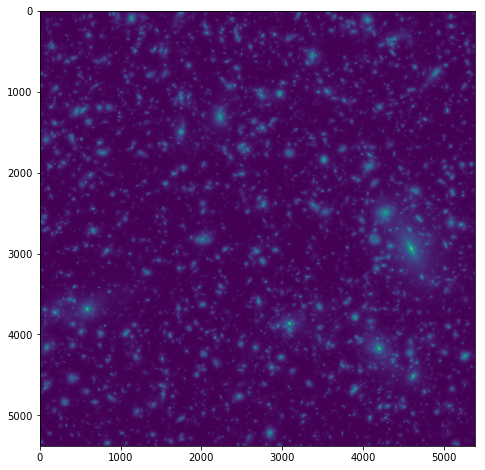

In [11]:
fig=pyplot.figure(figsize=(16,8))
pyplot.imshow(np.log10(image+1.0e-1))
pyplot.show()

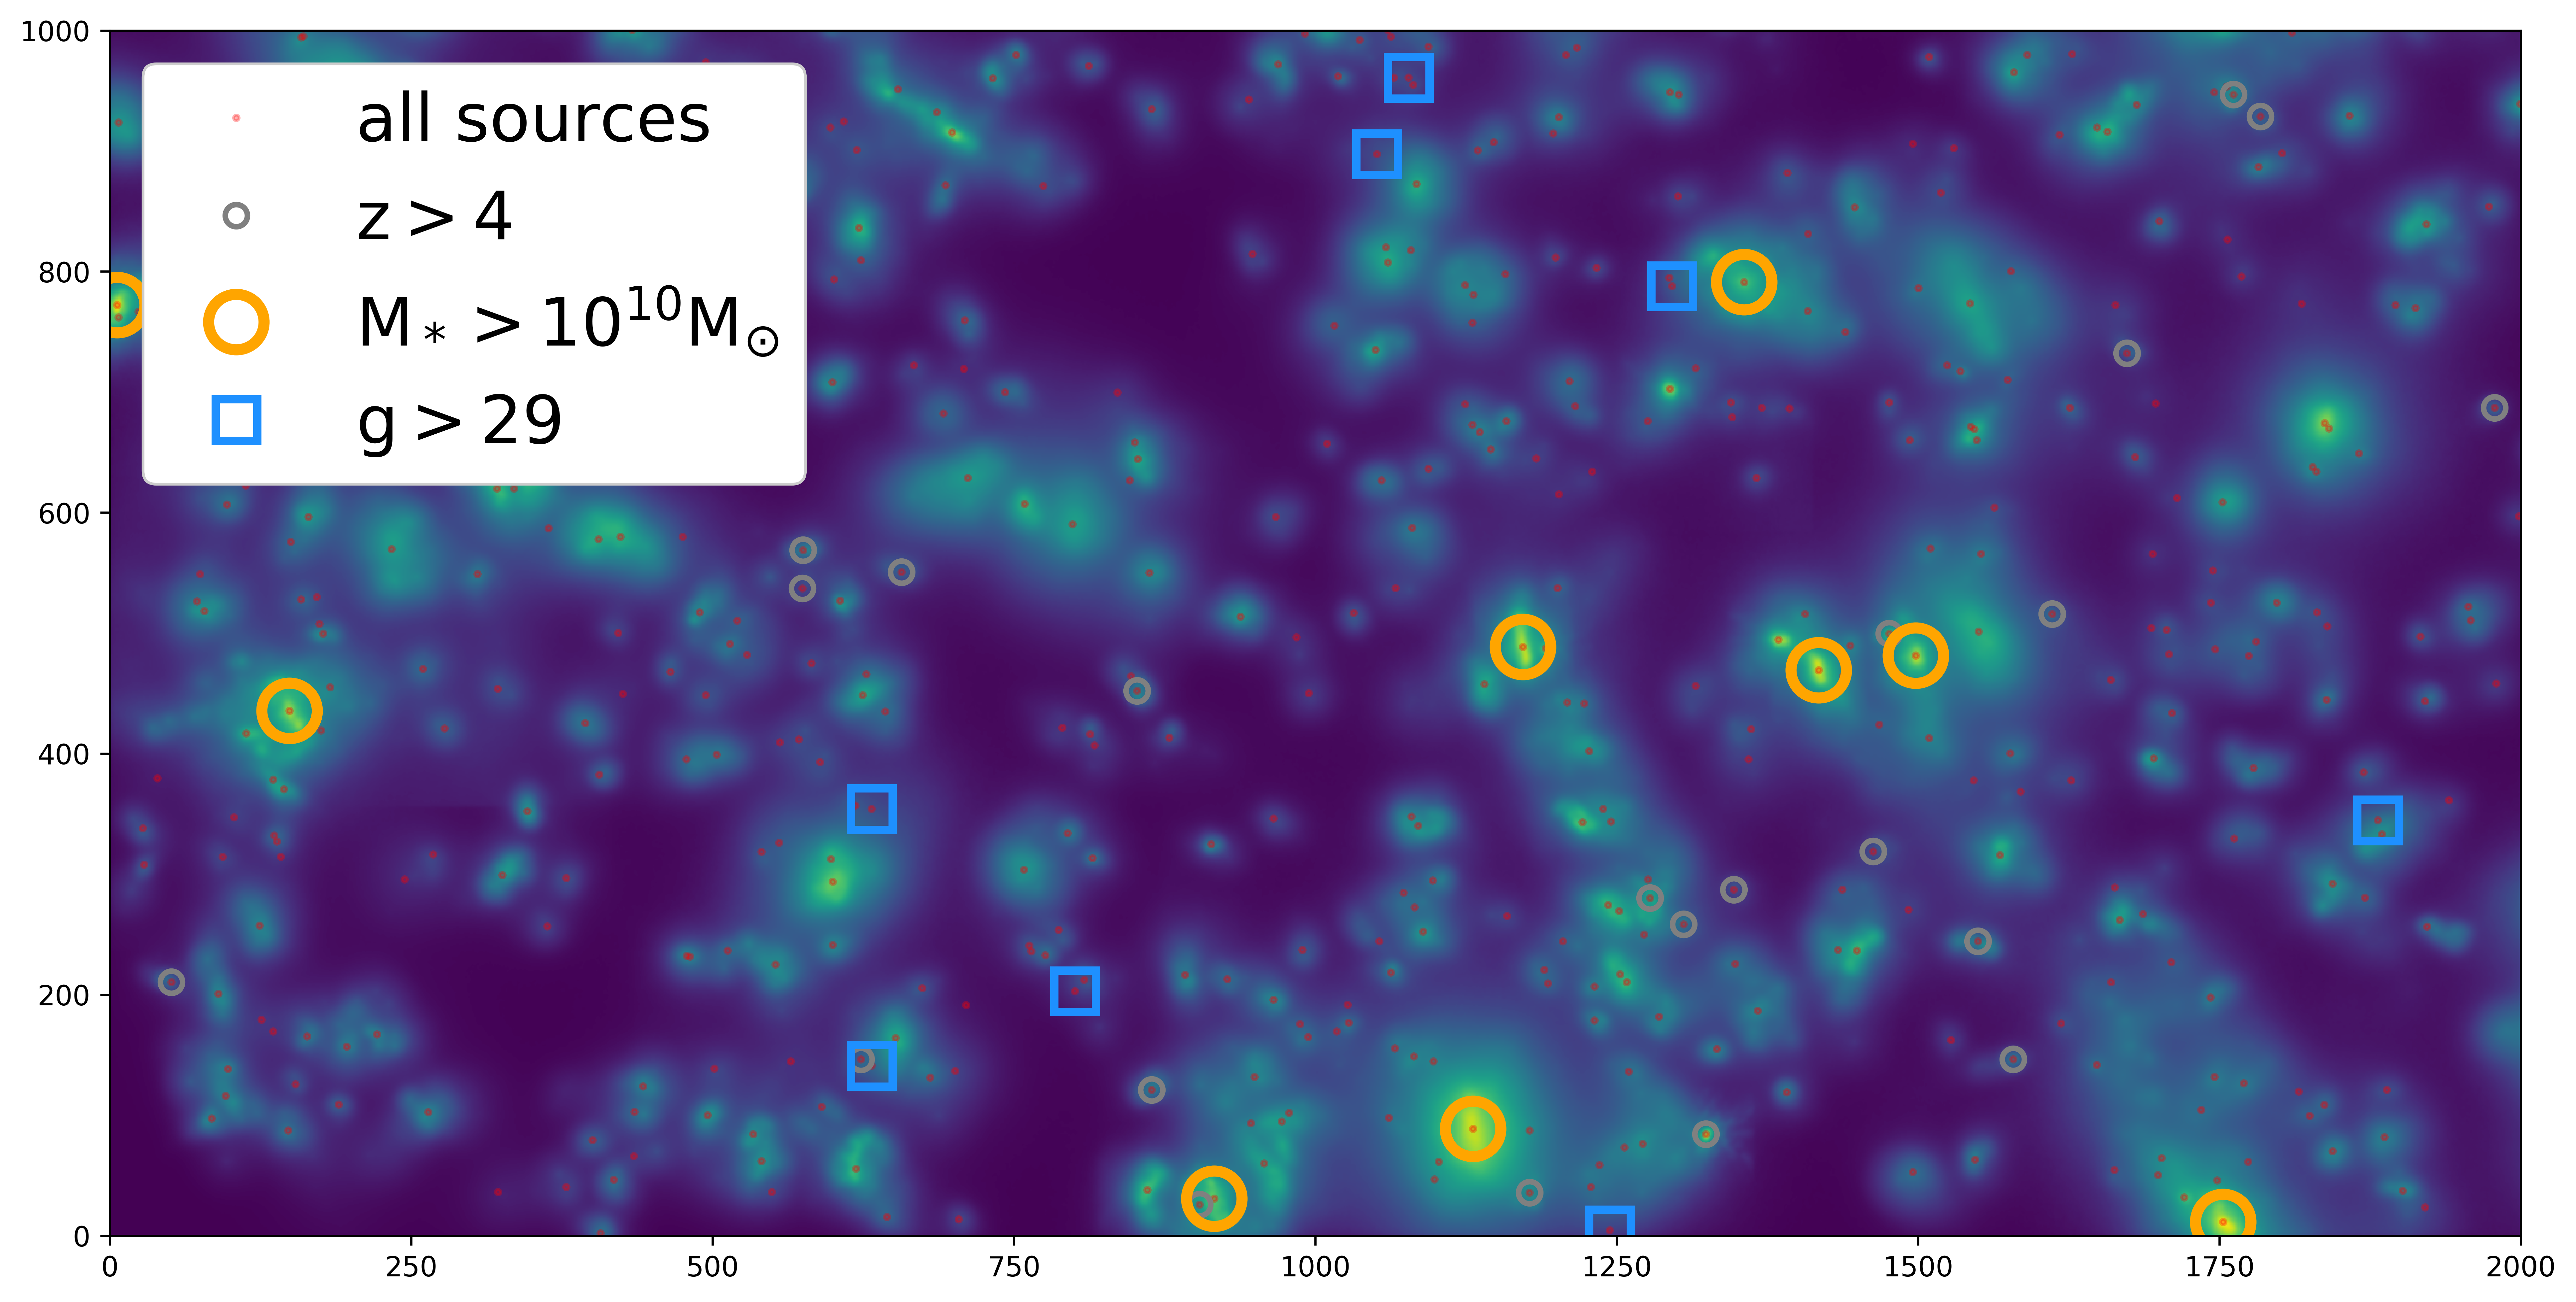

In [12]:
fig=pyplot.figure(figsize=(16,8),dpi=600)
pyplot.imshow(np.log10(image[0:1000,0:2000]+7.0e-3))
pyplot.plot(newj,newi,'or',markersize=2,alpha=0.3) ; pyplot.xlim(0,2000) ; pyplot.ylim(0,1000)
z=cat['true_z']
zi= z > 4
pyplot.plot(newj[zi],newi[zi],marker='o',markersize=8,markerfacecolor='None',markeredgecolor='Gray',linestyle='None',markeredgewidth=2)
m=cat['mstar_msun_rad']
mi=m>1.0e10
pyplot.plot(newj[mi],newi[mi],marker='o',markersize=20,markerfacecolor='None',markeredgecolor='Orange',linestyle='None',markeredgewidth=4)
distmod=cat['g_AB_appmag']-cat['g_AB_absmag']
h=cat['AB_absmag_jwst-nircam_f200w']+distmod
hi=h>29.0
pyplot.plot(newj[hi],newi[hi],marker='s',markersize=15,markerfacecolor='None',markeredgecolor='DodgerBlue',linestyle='None',markeredgewidth=3)

pyplot.legend(['all sources',r'$z > 4$',r'$M_* > 10^{10} M_{\odot}$',r'$g > 29$'],loc='upper left',fontsize=24,framealpha=1.0)

pyplot.show()